# Lecture 16: Exponential Distribution, Memoryless Property


## Stat 110, Joe Blitzstein, Harvard University

----

## Exponential Distribution

### Description

Real-valued distribution describing wait times, survival times. Rate parameter $\lambda \gt 0$. 

Continuous analog of the geometric distribution.

Unique in that the exponential distribution has the memoryless property.



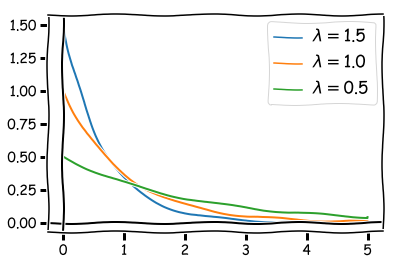

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

plt.xkcd()

x = np.linspace(0,5, 500)

_, ax = plt.subplots()

lambdas = [1.5, 1.0, 0.5]
for l in lambdas:
    y = l * np.e ** (l*-x)
    ax.plot(x, y, label="$\lambda = ${}".format(l))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

legend = ax.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)

plt.show()

### Notation

$X \sim Expo(\lambda)$

### Parameters

$\lambda$ - rate parameter where $\lambda \gt 0$

### Probability density function

\begin{align}
  f(x) &= 
  \begin{cases}
    \lambda e^{-\lambda x}, &\text{ if } x \ge 0 \\
    0, &\text{ otherwise }
  \end{cases}   
\end{align}



### Cumulative distribution function

\begin{align}
  F(x) &= \int_{0}^{x}  \lambda e^{-\lambda t} \, dt \\
         &= \lambda \int_{0}^{x} e^{-\lambda t} \, dt &\text{ let } u = -\lambda t \text{, } du =  -\lambda \, dt \\
         &= \int - e^{u} \, du \\ 
         &= - e^{u} \\
         &= \left. - e^{-\lambda t} \right|_{0}^{x} \\
         &= \boxed{ 1 - e^{-\lambda x} }
\end{align}

### Standardized Exponential Distribution

If we let $Y = \lambda X$, then $Y \sim \mathbb{Expo}(1)$.

You can compare this with the standardized Normal.

Proof

\begin{align}
  P(Y \le y) &= P\left(X \le \frac{y}{\lambda} \right) \\
             &= 1 - e^{-\lambda \frac{y}{\lambda}} &\text{ just plugging } \frac{y}{\lambda} \text{ into the CDF above} \\
             &= 1 - e^{-y} &\text{ which is the CDF of } \mathbb{Expo}(1) ~~~~ \blacksquare \\
\end{align}

We will next find the mean and variance of $\mathbb{Expo}(1)$, and then derive the general case mean and variance afterwards.

### Mean and variance of $\mathbb{Expo}(1)$

Let $Y \sim \mathbb{Expo}(1)$, find $\mathbb{E}(Y)$ and $\mathbb{Var}(Y)$.

\begin{align}
  \mathbb{E}(Y) &= \int_{0}^{\infty} y\,e^{-y}\,dy & &\text{ let } u = y \text{, } du = dy \\
    & & &\text{ and let } dv = e^{-y}\,dy \text{, } v = -e^{-y} \\
    &= \underbrace{ \left. -y e^{^y} \right\vert_{0}^{\infty}}_{\text{evaluates to }0} + \underbrace{\int_{0}^{\infty} e^{-y}\,dy}_{\text{PDF of }\mathbb{Expo}(1)} \\
    &= \boxed{1} \\
    \\\\
  \mathbb{Var}(Y) &= \mathbb{E}(Y^2) - \mathbb{E}Y ^2\\
    &= \int_{0}^{\infty} y^{2}\,e^{-y}\,dy \,- 1^2 & &\text{ let } u = y^{2} \text{, } du = 2y\,dy \\
    & & &\text{ and let } dv = e^{-y}\,dy \text{, } v = -e^{-y} \\
    &= \left. -y^{2}\,e^{^y} \right\vert_{0}^{\infty} + \int_{0}^{\infty} 2y\,e^{-y}\,dy \,-1 \\
    &= 0 + 2 - 1 \\
    &= \boxed{1}
\end{align}

### Mean and variance of $\mathbb{Expo}(\lambda)$

We can derive the mean and variance of $\mathbb{Expo}(\lambda)$ from that of $\mathbb{Expo}(1)$.

From $Y = \lambda X$ we have $X = \frac{y}{\lambda}$.

\begin{align}
  \mathbb{E}(X) &= \mathbb{E}\left(\frac{Y}{\lambda}\right) \\
                &= \frac{1}{\lambda} \, \mathbb{E}(Y) \\
                &= \boxed{ \frac{1}{\lambda} } \\
  \\\\
  \mathbb{Var}(X) &= \mathbb{Var}\left(\frac{Y}{\lambda}\right) \\
                  &= \frac{1}{\lambda^2} \, \mathbb{Var}(Y) \\
                  &= \boxed{ \frac{1}{\lambda^2} } \\
\end{align}

### Memorylessness Property

If you have a random variable representing a wait-time (continuous), the memorylessness property means that no matter how long you have already waited, the probability that you will have to wait an _additional_ time $t$ is the same as if you were starting fresh from 0 (irrespective of the time you already spent waiting).

Fact: $\mathbb{Expo}(\lambda)$ is the only distribution with the memorylessness property.

\begin{align}
  P(X \ge s+t | X \ge s) &= P(X \ge t) \\
\end{align}

The survival function is the random variable that describes how long something might live/exist, in constrast to that for a waiting time. In other words, $P(X \ge s)$ is the probability that some object of interest _lasts longer than_ a continuous time $s$. 

\begin{align}
  P(X \ge s) &= 1 - P(X \le s) \\
             &= 1 - (1 - e^{-\lambda s}) \\
             &= e^{-\lambda s} & \quad \text{ the survival function}
\end{align}

And so using this survival function in an equation using the definition of conditional probability, we have:

\begin{align}
  P(X \ge s+t | X \ge s) &= \frac{P(X \ge s+t \text{, }X \ge s)}{P(X \ge s)} \\
                         &= \frac{P(X \ge s+t)}{P(X \ge s)} & \quad \text{ since } P(X \ge s) \text{ is redundant} \\
                         &= \frac{e^{-\lambda (s+t)}}{e^{-\lambda s}} & \quad \text{ ratio of survival functions} \\
                         &= e^{-\lambda t} \\
                         &= P(X \ge t) & \quad \blacksquare
\end{align}

### Useful corollary of the Memorylessness Property

This is a brief introduction to conditional expectation, which is just like conditional probability.

Given $X \sim \mathbb{Expo}(\lambda)$, what is the expected wait-time if we have already waited for some time $a$?

\begin{align}
  \mathbb{E}(X | X \gt a) &= a + \mathbb{E}(X - a|X \gt a) & \quad \text{ by linearity} \\
                          &= a + \frac{1}{\lambda} & \quad \text{ by the memorylessness property}
\end{align}